In [1]:
import numpy as np

from nn.model import Sequential
from nn.layers import Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid


nn = Sequential(
    input_shape = (None, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ]
)

In [2]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [3]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [4]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
# x = np.squeeze(x)
# y = np.squeeze(y)

In [5]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [6]:
def backprob(layer, error, alpha=0.01):

    dz = layer.activation(layer.z, derivative=True) * error
            
    dw = np.dot(dz, layer.input.T)
    db = np.sum(dz, axis=1, keepdims=True)
    
    new_error = np.dot(layer.weights.T, dz)
    return new_error, dw, db

In [7]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

dz2_ = mse_prime(y[0], y_hat)


dz2 = nn.weights.wl1.activation(nn.weights.wl1.z, derivative=True) * dz2_

print('loss:', dz2)        

da1 = np.dot(nn.weights.wl1.weights.T, dz2)
dz1 = nn.weights.wl0.activation(nn.weights.wl0.z, derivative=True) * da1
print('loss2:', dz1)    
dw1 = np.dot(dz1, nn.weights.wl0.input.T)
db1 = np.sum(dz1, axis=1, keepdims=True)
        
dw2 = np.dot(dz2, nn.weights.wl1.input.T)
db2 = np.sum(dz2, axis=1, keepdims=True)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)


y_hat: [[0.38386749]]
loss: [[0.65460596]]
loss2: [[0.00044071]
 [0.00628814]
 [0.004474  ]]
dw1: [[0. 0.]
 [0. 0.]
 [0. 0.]]
db1: [[0.00044071]
 [0.00628814]
 [0.004474  ]]
dw2: [[0.4215301  0.05823979 0.21022222]]
db2: [[0.65460596]]


In [8]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

loss = mse_prime(y[0], y_hat)
print('loss:', loss)

loss1, dw2, db2 = backprob(nn.weights.wl1, loss)

loss2, dw1, db1 = backprob(nn.weights.wl0, loss1)
print('loss2', loss1)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)

y_hat: [[0.38386749]]
loss: [[0.76773497]]
loss2 [[0.00075293]
 [0.00633831]
 [0.00498848]]
dw1: [[0. 0.]
 [0. 0.]
 [0. 0.]]
db1: [[0.00044071]
 [0.00628814]
 [0.004474  ]]
dw2: [[0.4215301  0.05823979 0.21022222]]
db2: [[0.65460596]]


In [9]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

loss = mse_prime(y[0], y_hat)
print('loss:', loss)

loss1, dw2, db2 = nn.weights.wl1.backward(loss)

loss2, dw1, db1 = nn.weights.wl0.backward(loss1)
print('loss2', loss1)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)

y_hat: [[0.38386749]]
loss: [[0.76773497]]
loss2 [[0.00075293]
 [0.00633831]
 [0.00498848]]
dw1: [[0. 0.]
 [0. 0.]
 [0. 0.]]
db1: [[0.00044071]
 [0.00628814]
 [0.004474  ]]
dw2: [[0.4215301  0.05823979 0.21022222]]
db2: [[0.65460596]]


In [53]:
alpha = 0.1
n_epochs = 1000
errors = []
for epoch in range(n_epochs):
    er_ = []
    for x_i, y_i in zip(x, y):
          
        y_hat = nn.forward(x_i.T)
        print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        # error = categorical_cross_entropy(y_hat, y)
        loss = mse(y_i, y_hat)
        er_.append(loss.flatten())
        
        
        dz2_ = mse_prime(y_i, y_hat)
        
        dz2 = nn.weights.wl1.activation(nn.weights.wl1.z, derivative=True) * dz2_
        
        da1 = np.dot(nn.weights.wl1.weights.T, dz2)
        dz1 = nn.weights.wl0.activation(nn.weights.wl0.z, derivative=True) * da1
        
        dw1 = np.dot(dz1, nn.weights.wl0.input.T)
        db1 = np.sum(dz1, axis=1, keepdims=True)
        
        dw2 = np.dot(dz2, nn.weights.wl1.input.T)
        db2 = np.sum(dz2, axis=1, keepdims=True)
        
        nn.weights.wl0.weights -= alpha * dw1
        nn.weights.wl0.bias -= alpha * db1
        
        nn.weights.wl1.weights -= alpha * dw2
        nn.weights.wl1.bias -= alpha * db2
        
    errors.append(er_)  
    print("Epoch {}: Error - {}".format(epoch, loss))
        

 

<[[0 0]] | [[0]]> -> [[0.35112212]]
<[[0 1]] | [[1]]> -> [[0.26398637]]
<[[1 0]] | [[1]]> -> [[0.4505028]]
<[[1 1]] | [[0]]> -> [[0.5538542]]
Epoch 0: Error - 0.3067544800332758
<[[0 0]] | [[0]]> -> [[0.46291735]]
<[[0 1]] | [[1]]> -> [[0.3695294]]
<[[1 0]] | [[1]]> -> [[0.50592614]]
<[[1 1]] | [[0]]> -> [[0.58688084]]
Epoch 1: Error - 0.34442912278018156
<[[0 0]] | [[0]]> -> [[0.50103601]]
<[[0 1]] | [[1]]> -> [[0.4086985]]
<[[1 0]] | [[1]]> -> [[0.52736127]]
<[[1 1]] | [[0]]> -> [[0.59973949]]
Epoch 2: Error - 0.35968745817316805
<[[0 0]] | [[0]]> -> [[0.51706482]]
<[[0 1]] | [[1]]> -> [[0.42574825]]
<[[1 0]] | [[1]]> -> [[0.53661854]]
<[[1 1]] | [[0]]> -> [[0.60492849]]
Epoch 3: Error - 0.3659384813708275
<[[0 0]] | [[0]]> -> [[0.52443822]]
<[[0 1]] | [[1]]> -> [[0.43378802]]
<[[1 0]] | [[1]]> -> [[0.54071085]]
<[[1 1]] | [[0]]> -> [[0.60677129]]
Epoch 4: Error - 0.3681713954069017
<[[0 0]] | [[0]]> -> [[0.52799386]]
<[[0 1]] | [[1]]> -> [[0.43778958]]
<[[1 0]] | [[1]]> -> [[0.54243

In [54]:
print(y.flatten())
print([nn.forward(x_i.T).flatten().tolist() for x_i in x])


[0 1 1 0]
[[0.5218998272947375], [0.5228390203524212], [0.5182287752521109], [0.5191737716777731]]


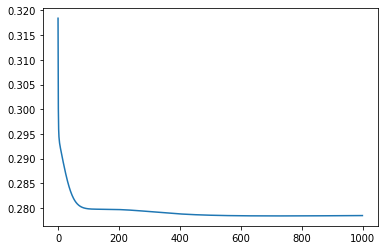

In [55]:
import matplotlib.pyplot as plt
mean_error = [np.mean(error_i) for error_i in errors]
plt.plot(range(0, n_epochs), mean_error)

In [ ]:
y_hat = nn.forward(x[0].T)
print('y_hat:', y_hat)

loss = mse_prime(y[0], y_hat)
print('loss:', loss)

loss1, dw2, db2 = backprob(nn.weights.wl1, loss)

loss2, dw1, db1 = backprob(nn.weights.wl0, loss1)
print('loss2', loss1)

print('dw1:', dw1)
print('db1:', db1)

print('dw2:', dw2)
print('db2:', db2)

In [99]:
nn = Sequential(
    input_shape = (None, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ]
)

In [102]:
wl = list(nn.weights.__dict__.values())
wl

[(3,2) | tanh, (1,3) | tanh]

In [105]:
nn.weights.

In [26]:
alpha = 0.1
n_epochs = 1000
errors = []
wl = list(nn.weights.__dict__.values())
for epoch in range(n_epochs):
    er_ = []
    for x_i, y_i in zip(x, y):
          
        y_hat = nn.forward(x_i.T)
        print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        # error = categorical_cross_entropy(y_hat, y)
        loss = mse(y_i, y_hat)
        er_.append(loss.flatten())
        
        
        error = mse_prime(y_i, y_hat)
        
        for layer in reversed(wl):
            error, dw, db = layer.backward(error)
            layer.update_params(dw=dw*alpha, db=db*alpha)
        
        
        
    errors.append(er_)  
    print("Epoch {}: Error - {}".format(epoch, loss))

<[[0 0]] | [[0]]> -> [[0.51522396]]
<[[0 1]] | [[1]]> -> [[0.39539697]]
<[[1 0]] | [[1]]> -> [[0.55336133]]
<[[1 1]] | [[0]]> -> [[0.63398502]]
Epoch 0: Error - 0.4019370104054076
<[[0 0]] | [[0]]> -> [[0.53333341]]
<[[0 1]] | [[1]]> -> [[0.41599557]]
<[[1 0]] | [[1]]> -> [[0.56174062]]
<[[1 1]] | [[0]]> -> [[0.6382495]]
Epoch 1: Error - 0.4073624304917346
<[[0 0]] | [[0]]> -> [[0.53976103]]
<[[0 1]] | [[1]]> -> [[0.42380854]]
<[[1 0]] | [[1]]> -> [[0.56446304]]
<[[1 1]] | [[0]]> -> [[0.63922961]]
Epoch 2: Error - 0.40861449030910096
<[[0 0]] | [[0]]> -> [[0.54210296]]
<[[0 1]] | [[1]]> -> [[0.42706252]]
<[[1 0]] | [[1]]> -> [[0.56509005]]
<[[1 1]] | [[0]]> -> [[0.63896917]]
Epoch 3: Error - 0.40828159517260476
<[[0 0]] | [[0]]> -> [[0.54290311]]
<[[0 1]] | [[1]]> -> [[0.42858931]]
<[[1 0]] | [[1]]> -> [[0.56490449]]
<[[1 1]] | [[0]]> -> [[0.63822003]]
Epoch 4: Error - 0.4073248031282886
<[[0 0]] | [[0]]> -> [[0.5431029]]
<[[0 1]] | [[1]]> -> [[0.42944624]]
<[[1 0]] | [[1]]> -> [[0.564

[0 1 1 0]
[[0.0012977790995704406], [0.971957613824845], [0.9718376299086621], [-0.0021958669175598266]]


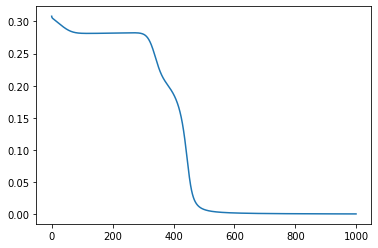

In [27]:
import matplotlib.pyplot as plt

print(y.flatten())
print([nn.forward(x_i.T).flatten().tolist() for x_i in x])

mean_error = [np.mean(error_i) for error_i in errors]
plt.plot(range(0, n_epochs), mean_error)

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from nn.model import Sequential
from nn.layers import Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid
from nn.loss import MeanSquaredError


nn = Sequential(
    input_shape = (None, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ],
    loss=MeanSquaredError()
)

In [7]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])

In [8]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [9]:
x = list(map(lambda x_i: x_i.T, x))

In [10]:
n_epochs = 1000
nn.fit(x, y, 1000, 0.05)

IncompleteModelError: Model missing ['optimzier'] attributes

In [57]:
x[0].shape

(2, 1)

In [59]:
nn.completeness_handler

AttributeError: 'Sequential' object has no attribute 'completeness_handler'

[0 1 1 0]
[[0.00902291344148074], [0.9356315865814311], [0.93442590678698], [0.003800455265552822]]


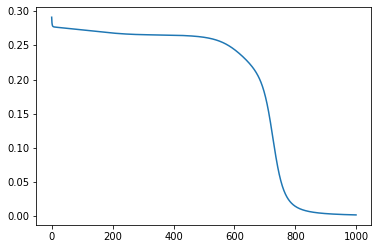

In [42]:
print(y.flatten())
print([nn.forward(x_i).flatten().tolist() for x_i in x])

mean_error = [np.mean(error_i) for error_i in nn.stat['losses']]
plt.plot(range(0, n_epochs), mean_error)

array([[0],
       [0]])

In [50]:
nn.predict([[1],[0]])

array([0.93442591])

In [5]:
from nn.loss import MeanSquaredError

In [6]:

MeanSquaredError.__class__

type

In [52]:
def foo(obj):
    try:
        if issubclass(obj)
        
class Inc:
    
    @staticmethod
    def inc(a):
        return a+1
    
    __call__ = inc
        
class Boo:
    
    def __init__(self, inc) -> None:
        self.inc = inc

In [53]:
Inc()

In [95]:
a = Inc
b = Inc()

c = Boo(a)
d = Boo(b)
e = Boo(Inc)
f = Boo(Inc())


isinstance(b, Inc)

True

In [96]:
d.inc(1)

2

In [ ]:
weakref.

In [84]:
dd.inc(1)

2

<function Inc.__subclasses__()>

In [68]:
isinstance(a, a.__class__)

True

In [14]:
isinstance(b, MeanSquaredError.__class__)

False

In [44]:
nn.forward(x[1].T)

array([[0.97435837]])

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [29]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (426, 30) | (426,)
Test shapes: (143, 30) | (143,)
Data example: 
 [1.382e+01 2.449e+01 9.233e+01 5.959e+02 1.162e-01 1.681e-01 1.357e-01
 6.759e-02 2.275e-01 7.237e-02 4.751e-01 1.528e+00 2.974e+00 3.905e+01
 9.680e-03 3.856e-02 3.476e-02 1.616e-02 2.434e-02 6.995e-03 1.601e+01
 3.294e+01 1.060e+02 7.880e+02 1.794e-01 3.966e-01 3.381e-01 1.521e-01
 3.651e-01 1.183e-01] -> 0


In [30]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
X_train = np.squeeze(x)
y_train = np.squeeze(y)

print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (4, 2) | (4,)
Data example: 
 [0 0] -> 0


In [31]:
nn = Sequential(InputLayer(2),
                Dense(2, activation=sigmoid),
                Dense(1, activation = sigmoid))

In [32]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [10]:
wl = list(nn.weights.__dict__.values())
wl

[(3,2) | tanh, (1,3) | tanh]

In [34]:
    
def backprob(error: np.ndarray, layer: WeightsLayer, alpha: float = 0.01):
    
    # error = error.reshape(-1, 1)
    # print('Weights before: {}'.format(layer.weights))
    dz = error * layer.activation(layer.z, derivative=True)
        
    dw = np.dot(dz.T, error)
    # dz = np.dot(activation_derivative.T, error)
    new_error = np.dot(dz, layer.weights)
    
    layer.weights -= alpha * dw
    layer.bias -= alpha * error
    # print('Weights after: {}'.format(layer.weights))
    
    # new_error = np.dot(activation_derivative, layer.weights)
    
    return new_error

In [35]:
alpha = 0.1
errors = []
bias = []
wl = list(nn.weights.__dict__.values())[:-1]
n_epochs = 1000
for epoch in range(n_epochs):
    errors_buffer = []
    b_buffer = []
    for x_i, y_i in zip(X_train ,y_train):
        y_hat = nn.forward(x_i)
        
        # print("<{} | {}> -> {}".format(x_i, y_i, y_hat))  
        loss = mse(y_i, y_hat)
        
        errors_buffer.append(loss)

        error = y_hat - y_i
        for weight_layer in reversed(wl):
            # print(weight_layer)
            # print('<{}>'.format(weight_layer))
            error = backprob(error, weight_layer)
            b_buffer.append(weight_layer.bias)
    errors.append(errors_buffer)
    bias.append(b_buffer)
    print("Epoch {}: Error - {}".format(epoch, np.mean(errors_buffer)))
    
errors = np.squeeze(np.array(errors))

ValueError: shapes (1,2) and (1,2) not aligned: 2 (dim 1) != 1 (dim 0)

In [36]:
error.reshape(-1, 1)

array([[0.52587045],
       [0.52587045]])

In [37]:
errors[0]

IndexError: list index out of range

In [38]:
print(y_train)
print([nn.forward(x_i).tolist() for x_i in X_train])

[0 1 1 0]
[[[0.525870449641462, 0.525870449641462]], [[0.525873586140893, 0.5258705195059721]], [[0.5258721959462933, 0.5258735657376559]], [[0.5258753315547376, 0.5258736355668853]]]


In [39]:
import matplotlib.pyplot as plt

In [40]:
mean_error = [np.mean(error_i) for error_i in errors]

In [41]:
mean_error

[]

ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

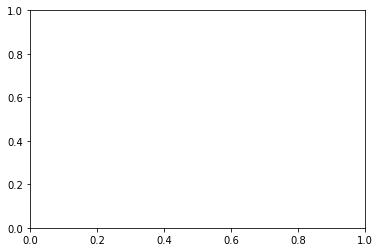

In [42]:
plt.plot(range(0, n_epochs), mean_error)

In [ ]:
bias[0]

[array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644]),
 array([-4.59190213]),
 array([-1.46343601, -0.68889644])]

In [19]:
import math
np.random.seed(0)
shape = (2, 3)
lower = -(np.sqrt(6.) / np.sqrt(shape[0] + shape[1]))
upper = np.sqrt(6.) / np.sqrt(shape[0] + shape[1])

weights = np.random.rand(*shape)
weights = lower + weights*(upper-lower)
weights



array([[ 0.10694503,  0.47145628,  0.22514328],
       [ 0.09833413, -0.16726395,  0.31963799]])

In [3]:
def foo(a):
    print('a: ->', a)
    return a+1

foo(2)

a: -> 2


3

In [18]:
x = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y = np.array([[[0]], [[1]], [[1]], [[0]]])
x = np.squeeze(x)
y = np.squeeze(y)


In [42]:
list(nn.weights.__dict__.values())[:-1]

[(3,2) : <function tanh at 0x00000283FF09D360>,
 (1,3) : <function tanh at 0x00000283FF09D360>]

# Classification test

In [51]:
import matplotlib.pyplot as plt
import numpy as np

from nn.model import Sequential
from nn.layers import InputLayer, Dense, WeightsLayer
from nn.activations import relu, tanh
from nn.losses import categorical_cross_entropy, mean_squared_error, BinaryCrossEntropy

In [52]:
from nn.losses import mean_squared_error

In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
x = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [55]:
print('Train shapes: {} | {}'.format(X_train.shape, y_train.shape))
print('Test shapes: {} | {}'.format(X_test.shape, y_test.shape))

print('Data example:', '\n', '{} -> {}'.format(X_train[0], y_train[0]))

Train shapes: (112, 4) | (112,)
Test shapes: (38, 4) | (38,)
Data example: 
 [6.7 3.1 4.7 1.5] -> 1


In [57]:
nn = Sequential(InputLayer(4),
                Dense(3, activation = relu),
                Dense(1, activation = tanh))

In [58]:

alpha = 0.01
errors = np.array([])
wl = list(nn.weights.__dict__.values())[:-1]
n = len(X_train)
for epoch in range(10):
    errors_buffer = []
    for x_i, y_i in zip(X_train[:n], y_train[:n]):
        y_hat = nn.forward(x_i)
        output_error = mean_squared_error(y_i, y_hat)
        errors_buffer.append(output_error)

        error = output_error
        for weight_layer in reversed(wl):
            # print('<{}>'.format(weight_layer))
            error = weight_layer.backward(error)
    errors = np.append(errors, errors_buffer, axis=0)
    print("Epoch {}: Error - {}".format(epoch, output_error))
    
    

Epoch 0: Error - 2.0
Epoch 1: Error - 2.0
Epoch 2: Error - 2.0
Epoch 3: Error - 2.0
Epoch 4: Error - 2.0
Epoch 5: Error - 2.0
Epoch 6: Error - 2.0
Epoch 7: Error - 2.0
Epoch 8: Error - 2.0
Epoch 9: Error - 2.0


In [60]:
y_hat = nn.forward(X_train[0])
print(y_hat, y_train[0])

def foo(y_true, y_pred):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

foo(y_train[0], y_hat)

# error_sum = 0
#     for ac, ex in zip(y_pred, y_true):
#         error_sum += (ac - ex)**2

[0.] 1


0.5

In [61]:
np.maximum(nn.weights.wl0.weights, 0.)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [62]:
y_test.reshape(1, -1)

array([[2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1]])

In [63]:
from nn.activations import apply_function_to_nparray

y_hat = np.array([])
for x_i in X_test:
    y_hat = np.append(y_hat, nn.forward(x_i))
  

print(y_hat)
y_hat = apply_function_to_nparray(y_hat, lambda value: 0 if value > 0 else 1)    


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [64]:
errors.shape

(1120,)

In [12]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_hat)
cm

array([[ 1, 11],
       [15,  3]], dtype=int64)

In [13]:
report = metrics.classification_report(y_test, y_hat)
print(report)

              precision    recall  f1-score   support

           0       0.06      0.08      0.07        12
           1       0.21      0.17      0.19        18

    accuracy                           0.13        30
   macro avg       0.14      0.12      0.13        30
weighted avg       0.15      0.13      0.14        30



In [40]:
plt.plot(range(0, 70), errors[:70])

NameError: name 'plt' is not defined

## Activatioins test

In [1]:
from nn.activations import relu
from nn.losses import BinaryCrossEntropy
import numpy as np

In [2]:
a = np.array([1,-1, 2,-2, 3])
relu(a)

array([1., 0., 2., 0., 3.])

In [3]:
relu(a, derivative=True)

array([1., 0., 1., 0., 1.])

In [5]:
(a > 0) * 1.

array([1., 0., 1., 0., 1.])

In [31]:
np.tanh([0.9963555249786387, -0.5288796417702989])

array([ 0.76005932, -0.48452422])

In [60]:
Y_true = [1,1,2,2,4]  # Y_true = Y (original values)
  
# Calculated values
Y_pred = [0.6,1.29,1.99,2.69,3.4]
mean_squared_error(Y_true, Y_pred)

0.21606

In [113]:
from nn.utils import set_repr

In [114]:
@set_repr("increment")
def foo(a: int):
    return a + 1 

In [115]:
foo

increment

In [79]:
class Foo:
    
    def __repr__(self) -> str:
        return self.__class__.__name__
    

class Boo(Foo):
    
    pass

In [80]:
a = Boo()
a

Boo

In [41]:
import numpy as np

from nn.model import Sequential
from nn.layers import Dense, WeightsLayer
from nn.activations import relu, tanh, sigmoid
from nn.loss import categorical_cross_entropy

In [42]:
nn = Sequential(
    input_shape = (1, 2),
    layers = [
        Dense(3, activation=tanh),
        Dense(1, activation=tanh),
    ]
)

In [43]:
nn.info()

model: Sequential
Dense | (3,2) | tanh
Dense | (1,3) | tanh


In [47]:
nn.fit([],[],10)

Start training for 10 epochs


UnboundLocalError: local variable 'stat_loss' referenced before assignment

In [39]:
a = nn.__dict__

In [35]:
a = {
    1: None,
    2: 2,
    3: 3
}


AttributeError: 'int' object has no attribute 'key'

In [40]:
[k for k, v in a.items() if v is None]

['optimzier', 'loss']

In [12]:
a = [1, 2, 3]
if 5 in a:
    print(a)

In [8]:
from nn.activations import relu
from nn.activations import get_mapped_function

In [7]:
from typing import Callable


isinstance(relu, Callable)

True

In [14]:
def f(fn) -> Callable:
    a = (fn if isinstance(fn, Callable)
            else get_mapped_function(fn))
    return a

In [18]:
c = f('relu')
c(1)

1.0

In [1]:
class Boo:
    
    def f(self, a):
        return a+1
    
    @staticmethod
    def f1(a):
        return a+1

In [5]:
b = Boo()
b.f.__class__

method

In [7]:
b.f1.__class__

function